In [14]:
# trains the baseline model and transfer learning models and gets information regarding accuracy
# plots grad-cam heat maps and confusion matrices

import numpy as np
import tensorflow as tf
from tensorflow.python.keras.utils.data_utils import Sequence
from tensorflow.keras.applications.resnet_v2 import preprocess_input

1 Physical GPUs, 1 Logical GPUs


In [15]:
data = np.load('d.npz', allow_pickle=True)
data = dict(data)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

x_train_p = preprocess_input(x_train)
x_test_p = preprocess_input(x_test)

classes = 23
from tensorflow.keras.utils import to_categorical
y_train_p = to_categorical(y_train, classes, dtype ="uint8")  
y_test_p = to_categorical(y_test, classes, dtype ="uint8") 

In [16]:
callback = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights = True)

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
#from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.constraints import max_norm

model = tf.keras.Sequential()

# resnet
model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224, 224, 3)))
#model.add(layers.experimental.preprocessing.RandomRotation(0.05,input_shape = (224, 224, 3)))
model.add(ResNet50V2(weights='imagenet',  
                 include_top=False,
                 pooling='avg'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(classes, kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4),
                 bias_regularizer=regularizers.l2(1e-4),
                 kernel_constraint=max_norm(2)))
model.add(layers.BatchNormalization(axis = 1))
model.add(layers.Activation('softmax'))

model.layers[1].trainable = False

# baseline
'''model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization(axis = 1))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization(axis = 1))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3)))
model.add(layers.BatchNormalization(axis = 1))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2048, (3, 3)))
model.add(layers.BatchNormalization(axis = 1))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(classes, kernel_regularizer=regularizers.l1_l2(l2=1e-3),
    bias_regularizer=regularizers.l2(1e-3),
    activity_regularizer=regularizers.l2(1e-3), activation = 'softmax'))'''


'# baseline\nmodel.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224, 3)))\nmodel.add(layers.Conv2D(64, (3, 3)))\nmodel.add(layers.BatchNormalization(axis = 1))\nmodel.add(layers.Activation(\'relu\'))\nmodel.add(layers.Dropout(.2))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(128, (3, 3)))\nmodel.add(layers.BatchNormalization(axis = 1))\nmodel.add(layers.Activation(\'relu\'))\nmodel.add(layers.Dropout(.2))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(256, (3, 3)))\nmodel.add(layers.BatchNormalization(axis = 1))\nmodel.add(layers.Activation(\'relu\'))\nmodel.add(layers.Dropout(.2))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(2048, (3, 3)))\nmodel.add(layers.BatchNormalization(axis = 1))\nmodel.add(layers.Activation(\'relu\'))\nmodel.add(layers.Dropout(.2))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(classes, kernel_regularizer=regularizers.l1_l

In [18]:
opt = optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer = opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(y_train_p.shape)
for layer in model.layers:
    print(layer.output_shape)

(7037, 23)
(None, 224, 224, 3)
(None, 2048)
(None, 2048)
(None, 23)
(None, 23)


In [19]:
tf.keras.backend.clear_session()
# model.fit(train_iterator, validation_data = val_iterator, epochs = 15, callbacks = [callback])
history = model.fit(x_train_p, y_train_p, batch_size = 32, epochs = 20, validation_split = 0.2, callbacks = [callback])

Epoch 1/20
176/176 [==============================] - 19s 106ms/step - loss: 3.5810 - accuracy: 0.2448 - val_loss: 2.7941 - val_accuracy: 0.4091
Epoch 2/20
176/176 [==============================] - 18s 100ms/step - loss: 2.6266 - accuracy: 0.4376 - val_loss: 2.4908 - val_accuracy: 0.4716
Epoch 3/20
176/176 [==============================] - 18s 100ms/step - loss: 2.3501 - accuracy: 0.4946 - val_loss: 2.3799 - val_accuracy: 0.4893
Epoch 4/20
176/176 [==============================] - 18s 101ms/step - loss: 2.2038 - accuracy: 0.5262 - val_loss: 2.3308 - val_accuracy: 0.5050
Epoch 5/20
176/176 [==============================] - 18s 101ms/step - loss: 2.1222 - accuracy: 0.5509 - val_loss: 2.2979 - val_accuracy: 0.5142
Epoch 6/20
176/176 [==============================] - 18s 101ms/step - loss: 2.0867 - accuracy: 0.5594 - val_loss: 2.2783 - val_accuracy: 0.5312
Epoch 7/20
176/176 [==============================] - 18s 101ms/step - loss: 2.0684 - accuracy: 0.5573 - val_loss: 2.2659 - val_ac

In [24]:
model.save('no_bn1')

INFO:tensorflow:Assets written to: no_bn1\assets


In [21]:
#model = tf.keras.models.load_model('d23_32drop3_con')
model.layers[1].trainable = True
opt = optimizers.Adam(learning_rate=1e-4)
model.compile(
    optimizer = opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
#tf.keras.backend.clear_session()
history = model.fit(x_train_p, y_train_p, batch_size = 32, epochs = 20, validation_split = 0.2, callbacks = [callback])

Epoch 1/20
176/176 [==============================] - 48s 272ms/step - loss: 2.1115 - accuracy: 0.5564 - val_loss: 1.9275 - val_accuracy: 0.6129
Epoch 2/20
176/176 [==============================] - 47s 268ms/step - loss: 1.2630 - accuracy: 0.8144 - val_loss: 1.8077 - val_accuracy: 0.6435
Epoch 3/20
176/176 [==============================] - 47s 270ms/step - loss: 0.8712 - accuracy: 0.9234 - val_loss: 1.7419 - val_accuracy: 0.6676
Epoch 4/20
176/176 [==============================] - 47s 268ms/step - loss: 0.6950 - accuracy: 0.9636 - val_loss: 1.7056 - val_accuracy: 0.6861
Epoch 5/20
176/176 [==============================] - 48s 270ms/step - loss: 0.6032 - accuracy: 0.9806 - val_loss: 1.6691 - val_accuracy: 0.6911
Epoch 6/20
176/176 [==============================] - 48s 273ms/step - loss: 0.5346 - accuracy: 0.9883 - val_loss: 1.6529 - val_accuracy: 0.6932
Epoch 7/20
176/176 [==============================] - 48s 271ms/step - loss: 0.4915 - accuracy: 0.9925 - val_loss: 1.6206 - val_ac

In [25]:
opt = optimizers.Adam(learning_rate=1e-5)
model.compile(
    optimizer = opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train_p, y_train_p, batch_size = 32, epochs = 20, validation_split = 0.2, callbacks = [callback])

Epoch 1/20
176/176 [==============================] - 48s 270ms/step - loss: 0.4490 - accuracy: 0.9957 - val_loss: 1.5086 - val_accuracy: 0.7074
Epoch 2/20
176/176 [==============================] - 47s 268ms/step - loss: 0.4263 - accuracy: 0.9973 - val_loss: 1.4963 - val_accuracy: 0.7088
Epoch 3/20
176/176 [==============================] - 47s 270ms/step - loss: 0.4093 - accuracy: 0.9989 - val_loss: 1.4846 - val_accuracy: 0.7074
Epoch 4/20
176/176 [==============================] - 48s 270ms/step - loss: 0.3966 - accuracy: 0.9991 - val_loss: 1.4634 - val_accuracy: 0.7081
Epoch 5/20
176/176 [==============================] - 48s 272ms/step - loss: 0.3845 - accuracy: 0.9996 - val_loss: 1.4479 - val_accuracy: 0.7116
Epoch 6/20
176/176 [==============================] - 48s 271ms/step - loss: 0.3698 - accuracy: 0.9998 - val_loss: 1.4332 - val_accuracy: 0.7124
Epoch 7/20
176/176 [==============================] - 48s 271ms/step - loss: 0.3584 - accuracy: 0.9998 - val_loss: 1.4283 - val_ac

In [26]:
model.evaluate(x_test_p, y_test_p)

56/56 [==============================] - 4s 77ms/step - loss: 1.3172 - accuracy: 0.7023


[1.3171943426132202, 0.70225989818573]

In [13]:
model.save('resnet50_1')

INFO:tensorflow:Assets written to: resnet50_1\assets


In [4]:
t = np.load('data/ito.npz', allow_pickle = True)
t = dict(t)
xt = t['x_test']
yt = t['y_test']
xt = preprocess_input(xt)
'''xt = x_test_p
yt = y_test'''
size = xt.shape[0]
top1 = 0.0
top5 = 0.0   
preds = model.predict(xt)
'''probs = np.array([.034,.037,0.050,0.031,0.042,0.039,0.055,0.036,0.035,0.076,0.036,0.046,0.075,0.038,0.043,0.035,0.044,0.039,0.038,0.050,0.035,0.035,.051])
for p in preds:
    p /= probs'''
for i, l in enumerate(yt):
    pred = preds[i]
    list5 = (-pred).argsort()[:5]
    top = pred.argmax()
    if top == l:
        top1 += 1.0
    if np.isin(l, list5):
        top5 += 1.0

print(top1/size, top5/size)

0.8762886597938144 0.9587628865979382


In [19]:
# Produces Grad-CAM heatmaps
# Adapted from https://keras.io/examples/vision/grad_cam/
# Modifications include the model that produces outputs of the last convolutional layer 
# and the one that takes in the last conv layer’s outputs and outputs scores for each class

from tensorflow.keras import layers
from tensorflow.keras.applications.densenet import DenseNet121
dense = model.layers[1].get_weights()
def gradcam(img_array, model):

    til_conv = tf.keras.Sequential()
    til_conv.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224, 224, 3)))
    til_conv.add(DenseNet121(weights=None,  
                 include_top=False,
                 pooling=None))
    til_conv.layers[1].set_weights(dense)
    
    # create model that takes resnet output as input and generate classification info
    classifier_model = tf.keras.Sequential()
    classifier_model.add(tf.keras.layers.GlobalAveragePooling2D(input_shape = til_conv.output_shape[1:]))
    classifier_model.add(model.layers[3])
    classifier_model.add(model.layers[4])
    classifier_model.add(model.layers[5])
    classifier_model.add(layers.Activation('softmax', name = 'softmax'))
    
    # compute the gradient of a class with respect to the activations of the last conv layer in resnet
    with tf.GradientTape() as tape:
        resnet_output = til_conv(img_array)
        tape.watch(resnet_output)
        preds = classifier_model(resnet_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # gradient of a class with regard to the output feature map of the last conv layer in resnet
    grads = tape.gradient(top_class_channel, resnet_output)

    # a vector where each entry is the mean of the gradient over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # multiply each channel in the feature map array by "how important this channel is" with regard to a class
    resnet_output = resnet_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        resnet_output[:, :, i] *= pooled_grads[i]

    # channel-wise mean of the resulting feature map
    heatmap = np.mean(resnet_output, axis=-1)

    # normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    
    return heatmap

In [158]:
import cv2
t=cv2.imread('d/zaha/02_zha_changsha_virgilesimonbertrand_lowres45-1440x1080.jpg')
heatmap = gradcam(np.array([preprocess_input(t)]), model)
(-model.predict(np.array([preprocess_input(t)]))).argsort()[0,:5] #.argmax()

array([22,  3, 13,  0,  2], dtype=int64)

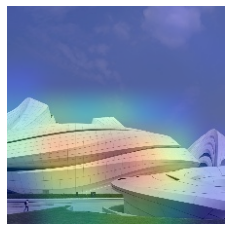

In [160]:
# adapted from https://keras.io/examples/vision/grad_cam/

import matplotlib.cm as cm
heatmap = np.uint8(255 * heatmap)
# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")
# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((224, 224))
jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.4 + cv2.cvtColor(t, cv2.COLOR_BGR2RGB)
superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
plt.axis('off')
plt.imshow(superimposed_img)

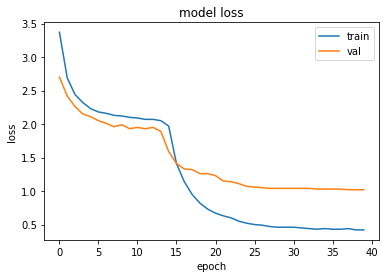

In [123]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.plot(v_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# confusion matrix

y_pred = model.predict(np.array(x_test_p))
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
new = np.zeros((classes, classes))
for i in range(classes):
    sum = np.sum(cm[i])
    new[i] = np.round(cm[i] / sum, 3)

In [ ]:
import matplotlib.ticker as plticker

y_labels = ['Tadao Ando 0', 'Coop Himmelb(l)au 1', 'Le Corbusier 2', 
          'Peter Eisenman 3', 'Frank Gehry 4', 'Steven Holl 5', 'Toyo Ito 6', 
          'Louis Kahn 7', 'Rem Koolhaas 8', 'Daniel Libeskind 9', 
          'Thom Mayne 10', 'Richard Meier 11', 'MVRDV 12', 'Oscar Niemeyer 13', 
          'IM Pei 14', 'Renzo Piano 15', 'Richard Rogers 16', 
          'Mies van der Rohe 17', 'SANAA 18', 'Bernard Tschumi 19', 
          'Wang Shu 20', 'Frank Lloyd Wright 21', 'Zaha Hadid 22']

x_labels = np.arange(23).tolist()

fig = plt.figure(figsize=(8, 8))
sub = fig.add_subplot(111)
mat = sub.matshow(new)
fig.colorbar(mat)

loc = plticker.MultipleLocator(base=1.0)
sub.xaxis.set_major_locator(loc)
sub.yaxis.set_major_locator(loc)
sub.set_xticklabels([''] + x_labels)
sub.set_yticklabels([''] + y_labels)
plt.xlabel('Prediction')
plt.ylabel('Truth')
sub.xaxis.set_label_position('top')
plt.show()